In [28]:
import sklearn
from tensorflow import keras
from explainer import metrics
from pgmpy.utils import get_example_model

# DATA

  0%|          | 0/8 [00:00<?, ?it/s]

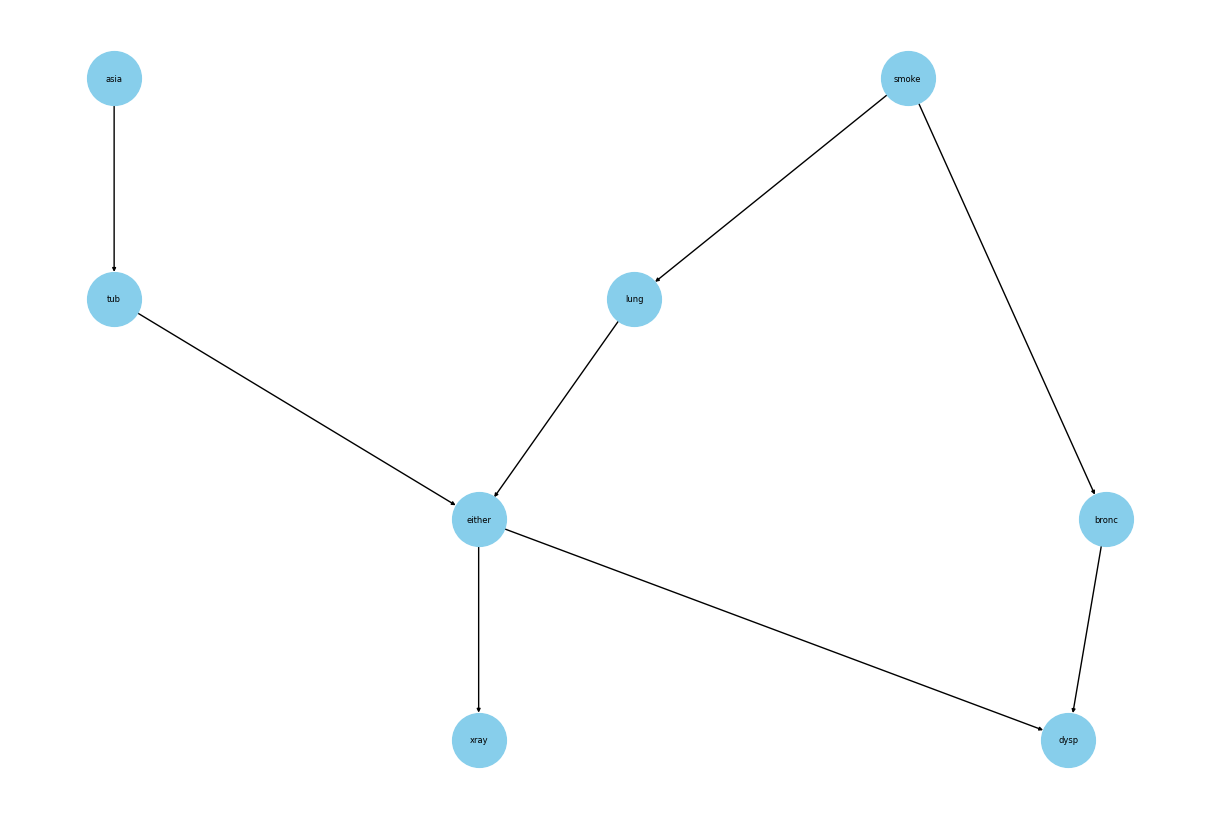

In [18]:
ground_bn = get_example_model("asia")
dataset = ground_bn.simulate(n_samples = 1000)
metrics.draw_network(ground_bn)

In [29]:
target = 'bronc'

X = dataset.drop(target, axis = 1).to_numpy()
y = dataset[target].to_numpy()

In [30]:
dataset[target].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [31]:
len(dataset[dataset[target] == 'no'])

567

In [32]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size = 0.1, random_state = 23, shuffle = True
)

In [33]:
feature_encoder = sklearn.preprocessing.OrdinalEncoder()
feature_encoder.fit(X_train)

target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(y_train.squeeze())

def preprocessor(x):
    return feature_encoder.transform(x)

In [34]:
X_train_proc = feature_encoder.transform(X_train)
y_train_proc = target_encoder.transform(y_train)

In [35]:
n_classes = len(np.unique(y))
input_shape = len(X[0])

print(f'Number of classes: {n_classes}')
print(f'Input Shape: {input_shape}')

Number of classes: 2
Input Shape: 7


# MODEL

In [36]:
def build_model(input_shape, classes, n_layers = 5, n_nodes_l = 2, n_nodes_u = 10, optimizer = 'adam', learning_rate = 0.001):
    
    model = keras.Sequential()
    model.add(keras.Input(shape = (input_shape,)))
    for i in range(n_layers):
        model.add(keras.layers.Dense(np.random.choice([i for i in range(n_nodes_l, n_nodes_u)]), activation = np.random.choice(['relu', 'sigmoid'])))
    model.add(keras.layers.Dense(classes, activation = 'softmax'))

    if optimizer == 'sgd':
        optim = keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == 'adam':
        optim = keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model



In [37]:
n_layers = 5
n_nodes_l = 5
n_nodes_u = 50
optimizer = 'adam'
learning_rate = 0.01
epochs = 25
batch_size = 64

In [373]:
model = build_model(
    input_shape,
    n_classes,
    n_layers = n_layers, 
    n_nodes_l = n_nodes_l,
    n_nodes_u = n_nodes_u, 
    optimizer = optimizer, 
    learning_rate = learning_rate
)

'''
config = wandb.config
config.n_layers = n_layers
config.n_nodes_l = n_nodes_l
config.n_nodes_u = n_nodes_u
config.optimizer = optimizer
config.epochs = epochs
config.batch_size = batch_size
config.learning_rate = learning_rate
'''

model.fit(X_train_proc, y_train_proc, epochs = epochs, batch_size = batch_size, validation_split = 0.2)
model.summary()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5056 - loss: 0.7116 - val_accuracy: 0.3778 - val_loss: 0.7255
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5681 - loss: 0.6726 - val_accuracy: 0.6222 - val_loss: 0.6041
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.5186 - val_accuracy: 0.8500 - val_loss: 0.4372
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.4350 - val_accuracy: 0.8444 - val_loss: 0.4175
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.4097 - val_accuracy: 0.8611 - val_loss: 0.4026
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.4021 - val_accuracy: 0.8611 - val_loss: 0.4519
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.3977 - val_accuracy: 0.8611 - val_loss: 0.4136
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.3868 - val_accuracy: 0.8611 - val_loss

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 23)             │           184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 29)             │           696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 23)             │           690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 40)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            82 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,334 (52.09 KB)

 Trainable params: 4,444 (17.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,890 (34.73 KB)

In [374]:
X_test_proc = feature_encoder.transform(X_test)
y_test_proc = target_encoder.transform(y_test)

y_pred = model(X_test_proc)
y_pred = np.argmax(y_pred, axis = 1)
sklearn.metrics.accuracy_score(y_pred, y_test_proc)

0.87

# INFINITE TSUKI NO ME

In [375]:
import itertools
import numpy as np
import pandas as pd
from pgmpy.base import PDAG
from pgmpy.estimators import PC, HillClimbSearch, ExpertKnowledge
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [530]:
class Explainer:
    
    def __init__(self, model, X, target, preprocessor, n_samples = 100, rep_prob = 0.5):
        
        self.X = X.to_numpy()
        
        self.x_cols = X.columns
        self.y_col = target
        
        self.model = model
        self.preprocessor = preprocessor
        
        self.n_samples = n_samples
        self.rep_prob = rep_prob
        
        
        self.associations = None
        self.data = None
        
        self.dag = None
        self.pdag = None
        
    def data_generation(self, x):
        
        y = self.model.predict(self.preprocessor(x.reshape(1, -1)), verbose = 0).squeeze(0)
        y_argmax = y.argmax()
        
        random_indices = np.random.randint(len(self.X), size = self.n_samples)
        samples_X_base = self.X[random_indices]
        
        replace_mask = np.random.rand(self.n_samples, samples_X_base.shape[1]) < self.rep_prob
        
        samples_X_generated = np.where(replace_mask, x, samples_X_base)
        
        preprocessed_batch = self.preprocessor(samples_X_generated)
        
        samples_Y_raw = self.model.predict(preprocessed_batch, verbose = 0)
        
        samples_Y_argmax = samples_Y_raw.argmax(axis = 1)
        
        samples_Y_bool = samples_Y_argmax != y_argmax
        
        samples_X_bool = samples_X_generated != x
        
        samples_X_int = samples_X_bool.astype(int)
        samples_Y_int = samples_Y_bool.astype(int)
        
        self.data = pd.DataFrame(samples_X_int, columns = self.x_cols)
        self.data[self.y_col] = samples_Y_int

    def fp_growth(self, min_support, min_threshold):
        
        data = self.data.astype(bool)
        
        patterns = fpgrowth(data, min_support = min_support, use_colnames = True)
        
        self.associations = association_rules(patterns, metric = "confidence", min_threshold = min_threshold)

    def statistical_relevance(self):
        
        associations = self.associations[self.associations['consequents'] == frozenset({'bronc'})]
        
        associations = associations.sort_values(by = 'confidence', ascending = False).reset_index(drop = True)
        
        redundant = set()
        
        for i in range(len(associations)):
            
            if i in redundant:
                continue
            
            super_ant = associations.loc[i, 'antecedents']
            super_conf = associations.loc[i, 'confidence']
            
            for j in range(len(associations)):
                
                if i == j or j in redundant:
                    continue
                
                sub_ant = associations.loc[j, 'antecedents']
                sub_conf = associations.loc[j, 'confidence']
                
                if sub_ant.issubset(super_ant) and sub_ant != super_ant and sub_conf >= super_conf:
                    
                    redundant.add(i)
                    break
        
        associations = associations.drop(index = list(redundant)).reset_index(drop = True)
        
        self.associations = associations[['antecedents', 'consequents', 'support', 'confidence']]

    def structures(self):
        
        nodes = set()
        edges = set()
        
        for i in range(len(self.associations)):
            
            ant_nodes = list(self.associations.loc[i, 'antecedents'])
            ant_edges = list(itertools.combinations(ant_nodes + [self.y_col], 2))
            
            nodes.update(ant_nodes)
            edges.update(ant_edges)
        
        self.pdag = PDAG(undirected_ebunch = list(edges))
        
        forbidden_edges = [(self.y_col, node) for node in nodes]
        
        no_child_constraint = ExpertKnowledge(forbidden_edges = forbidden_edges)

        est = HillClimbSearch(data = self.data[list(nodes) + [self.y_col]])

        self.dag = est.estimate(scoring_method = "bic-d", expert_knowledge = no_child_constraint)
        
    def explain(self, x, min_support, min_threshold):
        
        self.data_generation(x)
        self.fp_growth(min_support, min_threshold)
        self.statistical_relevance()
        self.structures()

In [584]:
explainer = Explainer(model, dataset.drop(target, axis = 1), target, preprocessor, n_samples = 1000, rep_prob = 0.1)
x = X_test[np.random.randint(len(X_test))]

In [585]:
explainer.explain(x, 0.01, 0.7)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'xray': 'N', 'dysp': 'N', 'smoke': 'N', 'bronc': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'xray': 'N', 'dysp': 'N', 'smoke': 'N', 'bronc': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'xray': 'N', 'dysp': 'N', 'smoke': 'N', 'bronc': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [586]:
explainer.associations

,antecedents,consequents,support,confidence
0,"(xray, dysp, smoke)",(bronc),0.042,1.000000
1,"(dysp, smoke)",(bronc),0.250,0.984252
2,(dysp),(bronc),0.408,0.978417


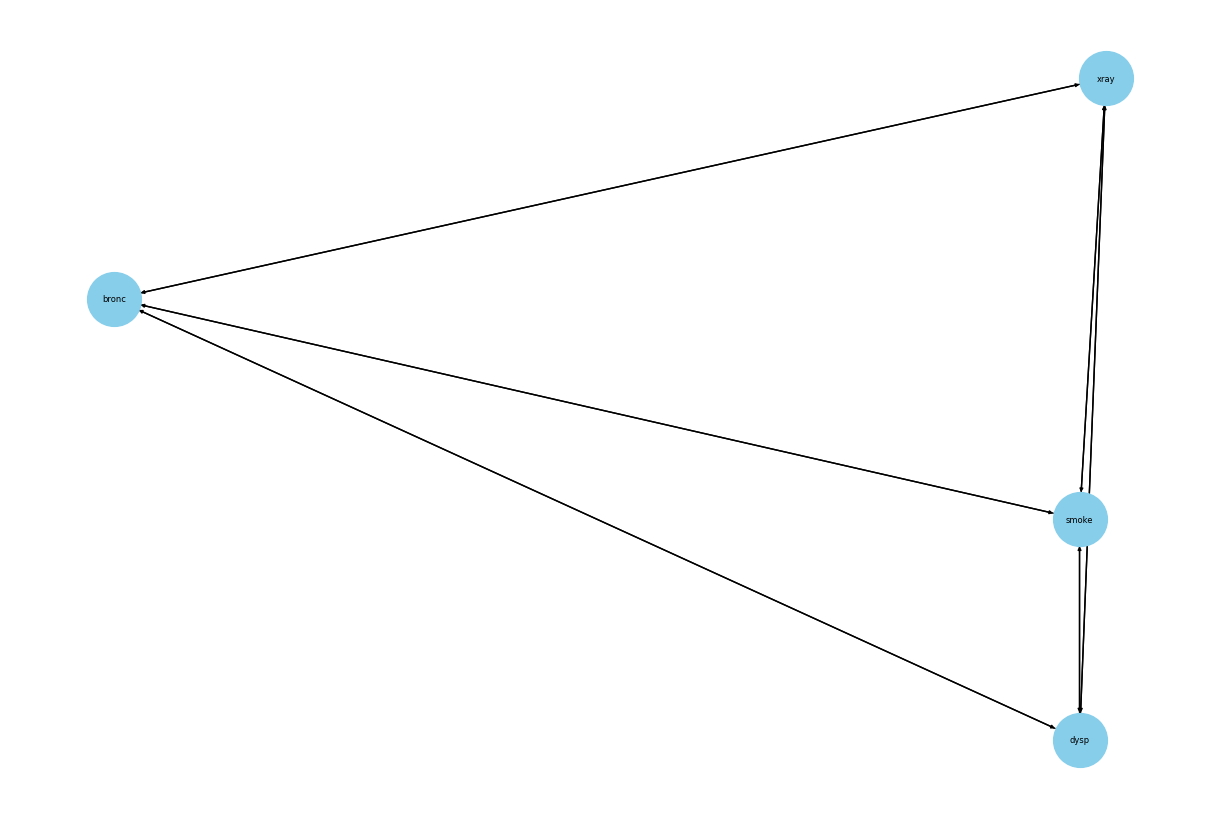

In [587]:
metrics.draw_network(explainer.pdag)

In [588]:
explainer.dag.get_independencies()

(bronc ⟂ xray | dysp)
(xray ⟂ dysp | smoke)
(bronc ⟂ smoke | dysp)

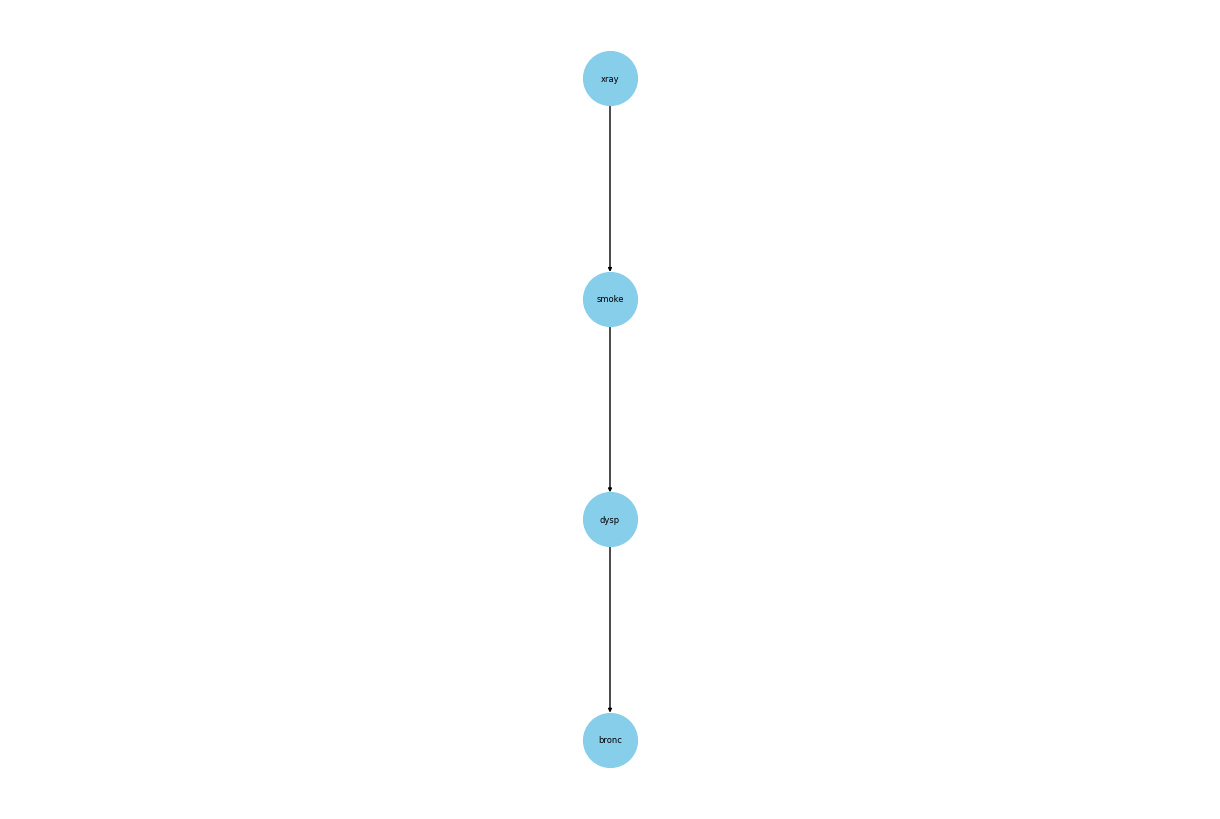

In [589]:
metrics.draw_network(explainer.dag)